<a href="https://colab.research.google.com/github/shashiyarlagadda/Image_Recognition_Devtown/blob/main/Image_Recoginition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 01


In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shashiyarlagadda","key":"691ca4263d34b2be43c0340da06a394a"}'}

In [3]:
!mkdir ~/.kaggle
!cp "kaggle.json" ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(f"Train shape: (x_train.shape), Test shape: (x_test.shape)")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (x_train.shape), Test shape: (x_test.shape)


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"Train reshaped: (x_train.shape)")

Train reshaped: (x_train.shape)


<function matplotlib.pyplot.show(close=None, block=None)>

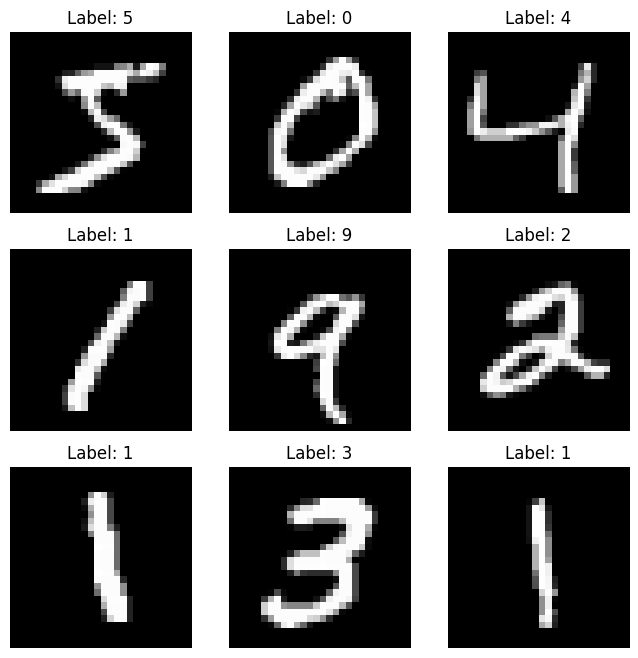

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap="grey")
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show

In [9]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


Day 02


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
      Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history= model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8962 - loss: 0.3333 - val_accuracy: 0.9822 - val_loss: 0.0579
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9845 - loss: 0.0485 - val_accuracy: 0.9867 - val_loss: 0.0431
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9891 - val_loss: 0.0348
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9864 - val_loss: 0.0468
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9891 - val_loss: 0.0399


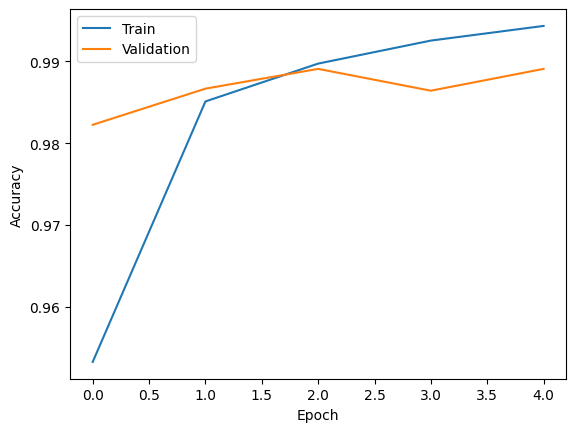

In [13]:

plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy:{test_acc:.4f}")
y_pred = model.predict(x_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9853 - loss: 0.0418
Test Accuracy:0.9884
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Day 03

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [17]:
from tensorflow.keras.layers import BatchNormalization, Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=5,validation_data=(x_test_c10,y_test_c10))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.3465 - loss: 1.7859 - val_accuracy: 0.4243 - val_loss: 1.6875
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5323 - loss: 1.3185 - val_accuracy: 0.5755 - val_loss: 1.1805
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.5798 - loss: 1.1996 - val_accuracy: 0.6338 - val_loss: 1.0708
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.6096 - loss: 1.1119 - val_accuracy: 0.5997 - val_loss: 1.2150
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6286 - loss: 1.0618 - val_accuracy: 0.6713 - val_loss: 0.9556


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.79      0.86      0.82      1000
           2       0.74      0.39      0.51      1000
           3       0.50      0.52      0.51      1000
           4       0.69      0.48      0.56      1000
           5       0.58      0.60      0.59      1000
           6       0.75      0.79      0.77      1000
           7       0.55      0.82      0.66      1000
           8       0.86      0.67      0.75      1000
           9       0.67      0.85      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



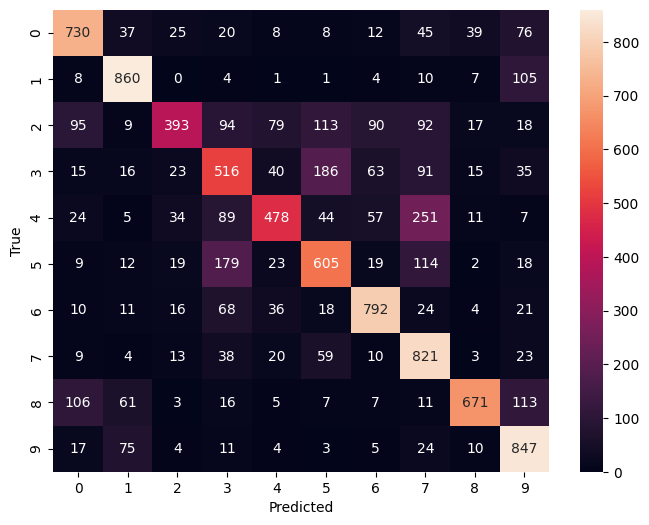

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Day 04

In [19]:
!kaggle datasets download -d tongpython/cat-and-dog --force

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 66% 143M/218M [00:00<00:00, 1.50GB/s]
100% 218M/218M [00:00<00:00, 501MB/s] 


In [20]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.7822 - loss: 0.5415 - val_accuracy: 0.7985 - val_loss: 0.5134
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 220s 853ms/step - accuracy: 0.7977 - loss: 0.4960 - val_accuracy: 0.7985 - val_loss: 0.5127
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 219s 872ms/step - accuracy: 0.7996 - loss: 0.4805 - val_accuracy: 0.7985 - val_loss: 0.5222
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 282s 954ms/step - accuracy: 0.7992 - loss: 0.4656 - val_accuracy: 0.7945 - val_loss: 0.5262
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 230s 919ms/step - accuracy: 0.8101 - loss: 0.4382 - val_accuracy: 0.7975 - val_loss: 0.5255


In [23]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )
model.fit(train_generator,epochs=5,validation_data=val_generator)


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 892s 3s/step - accuracy: 0.7972 - loss: 0.4909 - val_accuracy: 0.7970 - val_loss: 0.5278
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 870s 3s/step - accuracy: 0.8059 - loss: 0.4471 - val_accuracy: 0.7965 - val_loss: 0.5293
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 816s 3s/step - accuracy: 0.8105 - loss: 0.4198 - val_accuracy: 0.7960 - val_loss: 0.5331
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 829s 3s/step - accuracy: 0.8131 - loss: 0.3986 - val_accuracy: 0.7970 - val_loss: 0.5358
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 824s 3s/step - accuracy: 0.8189 - loss: 0.3717 - val_accuracy: 0.7925 - val_loss: 0.5411


In [24]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 655ms/step


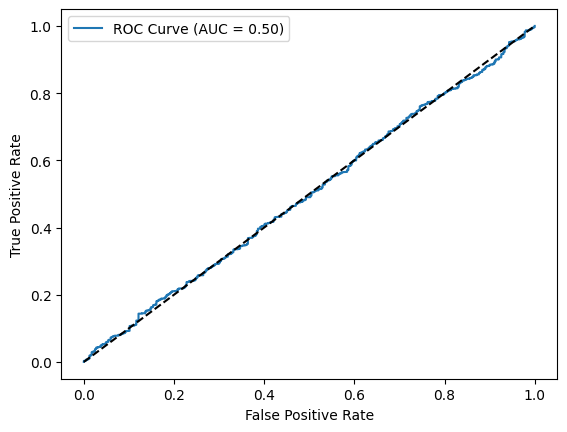

In [25]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Day 05


In [37]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'd.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving d.jpg to d (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: Dog


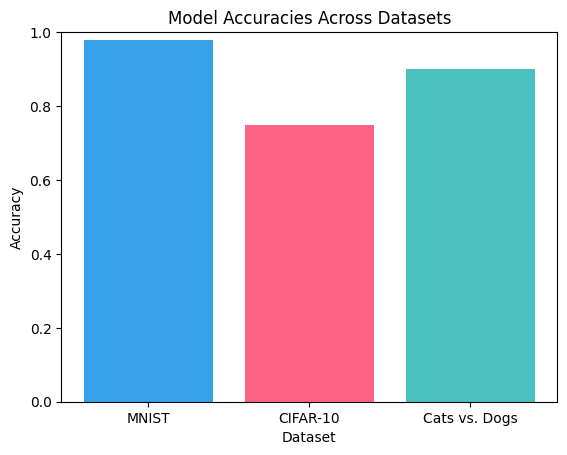

In [35]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()
